## 2. Under-Sampling

In [20]:
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
from imblearn.under_sampling import ClusterCentroids,NeighbourhoodCleaningRule
from imblearn.under_sampling import RandomUnderSampler, NearMiss, EditedNearestNeighbours, AllKNN
from imblearn.under_sampling import RepeatedEditedNearestNeighbours, CondensedNearestNeighbour 
from imblearn.under_sampling import InstanceHardnessThreshold, OneSidedSelection
from collections import Counter

Se a nossa opção é usar o método Under_sampling para fazer o rebalanceamento dos dados, então estamos falando de diversas ferramentas para isso. Vamos ilustrar algumas. A primeira e mais simples, o algoritmo K-means, usado em análise de cluster, é aqui aplicado para gerar uma sub-amostra onde as classes passam a ser sintetizadas em centróides. Esse método também é conhecido como prototype generation algorithms.

Dados em cada uma das classes [(0, 64), (1, 262), (2, 4674)]
Dados rebalanceados:  [(0, 64), (1, 64), (2, 64)]
Score para o modelo SVM rebalanceado 0.7916666666666666


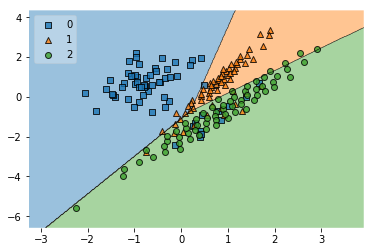

In [6]:
X,y =make_classification(n_samples=5000, n_features=2, n_informative=2, n_classes=3, n_clusters_per_class=1,
                        n_redundant=0,n_repeated=0,weights=[0.01,0.05,0.94],class_sep=0.8,random_state=0)
print("Dados em cada uma das classes",sorted(Counter(y).items()))
m1=ClusterCentroids(random_state=0)
X1,y1=m1.fit_resample(X,y)
print("Dados rebalanceados: ",sorted(Counter(y1).items()))
svm1=LinearSVC(C=1,random_state=0).fit(X1,y1)
print("Score para o modelo SVM rebalanceado",svm1.score(X1,y1))
plot_decision_regions(X=X1,y=y1,clf=svm1,legend=2)

Uma outra forma de fazer uma sub-amostra dos dados seria a partir de um algoritmo que selecione uma amostra dos dados originais, no que se denomina de prototype selection algorithm. Aqui temos 2 possibilidades. A primeira é especificando o tamanho da amostra que queremos, também conhecido como "Controlled under_sampling". A segunda parte, não especifica o tamanho da amostra, conhecida como "Cleaning under_sampling".

Dados com resample controlada:  dict_items([(0, 64), (1, 64), (2, 64)])
Score para o modelo SVM rebalanceado 0.7916666666666666


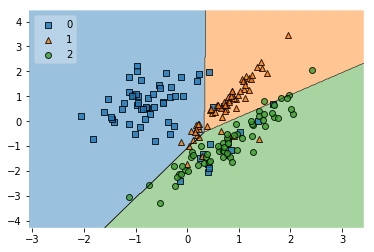

In [8]:
# Vejamos a controlled under_sampling
rus=RandomUnderSampler(random_state=0)
X2,y2=rus.fit_resample(X,y)
print("Dados com resample controlada: ",Counter(y2).items())
svm2=LinearSVC(C=1,random_state=0).fit(X2,y2)
print("Score para o modelo SVM rebalanceado",svm2.score(X2,y2))
plot_decision_regions(X=X2,y=y2,clf=svm2,legend=2)

A primeira técnica de cleaning under_sampling que vamos ilustrar faz uso do algoritmo Nearest-Neighbors para eliminar dados que não estariam suficientemente combinando com o conjunto. Podemos usar tanto o algoritmo "EditedNearestNeighbours" quanto o "RepeatedEditedNearestNeighbours", esse último acaba repetindo o anterior, o que resulta em uma quantidade menor na amostra, ou ainda o AllKNN. Vejamos ambos e seus resultados para um SVM linear.

Dados com resample cleaning:  dict_items([(0, 64), (1, 213), (2, 4568)])
Score para o modelo SVM rebalanceado 0.98328173374613


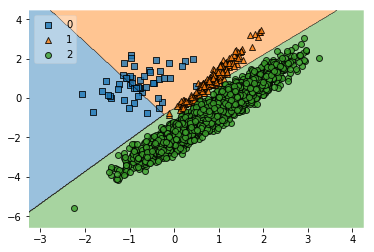

In [9]:
# Cleaning under_sampling
enn=EditedNearestNeighbours()
X3,y3 = enn.fit_resample(X,y)
print("Dados com resample cleaning: ",Counter(y3).items())
svm3=LinearSVC(C=1,random_state=0).fit(X3,y3)
print("Score para o modelo SVM rebalanceado via Edited",svm3.score(X3,y3))
plot_decision_regions(X=X3,y=y3,clf=svm3,legend=2)

Dados com resample cleaning:  dict_items([(0, 64), (1, 208), (2, 4551)])
Score para o modelo SVM rebalanceado via RepeatedEdit 0.9850715322413436


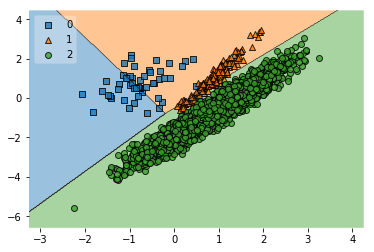

In [10]:
# Cleaning under_sampling
renn=RepeatedEditedNearestNeighbours()
X4,y4 = renn.fit_resample(X,y)
print("Dados com resample cleaning: ",Counter(y4).items())
svm4=LinearSVC(C=1,random_state=0).fit(X4,y4)
print("Score para o modelo SVM rebalanceado via RepeatedEdit",svm4.score(X4,y4))
plot_decision_regions(X=X4,y=y4,clf=svm4,legend=2)

Dados com resample cleaning:  dict_items([(0, 64), (1, 220), (2, 4601)])
Score para o modelo SVM rebalanceado via AllKNN 0.9823950870010235


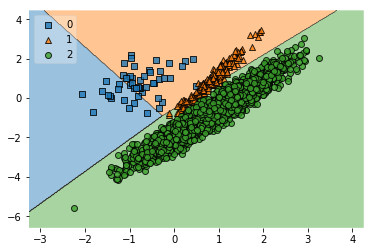

In [11]:
# Cleaning under_sampling
allknn=AllKNN()
X5,y5 = allknn.fit_resample(X,y)
print("Dados com resample cleaning: ",Counter(y5).items())
svm5=LinearSVC(C=1,random_state=0).fit(X5,y5)
print("Score para o modelo SVM rebalanceado via AllKNN",svm5.score(X5,y5))
plot_decision_regions(X=X5,y=y5,clf=svm5,legend=2)

Um outro algoritmo que pode ser usado para under_sampling é o Condensed Nearest Neighbour. Aqui o processo segue cinco passos: primeiro denomina o conjunto de dados menores de C. A seguir adiciona uma amostra originária do conjunto de dados considerado como target que, nesse caso, é aquele que representa a classe maior, juntamente no conjunto C e todos os demais dados em um outro conjunto S. De posse do conjunto S, percorre-se o mesmo, amostra por amostra classificando-as usando a regra de 1_Nearest_Neighbour. Todas as amostras que não forem bem classificadas são adicionadas ao conjunto C, repetindo o processo até percorrer todo o conjunto de dados S. <br>
Um dos problemas com esse método é que o mesmo é sensível a dados com ruídos, adicionando esses ruídos nas amostras. Veja, pelo exemplo abaixo, que os resultados do SVM não são tão bons.

Dados com resample via Condensed_NN dict_items([(0, 64), (1, 24), (2, 115)])
Score para o modelo SVM rebalanceado via Condensed_NN 0.8177339901477833


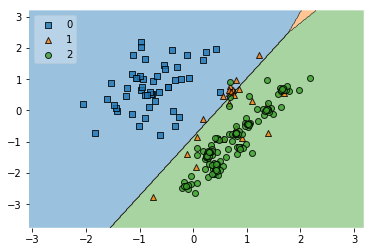

In [13]:
cnn=CondensedNearestNeighbour(random_state=0)
X6,y6 = cnn.fit_resample(X,y)
print("Dados com resample via Condensed_NN",Counter(y6).items())
svm6=LinearSVC(C=1,random_state=0).fit(X6,y6)
print("Score para o modelo SVM rebalanceado via Condensed_NN",svm6.score(X6,y6))
plot_decision_regions(X=X6,y=y6,clf=svm6,legend=2)

Uma forma de contornar esse problema de adicionar o ruído, é usar o método "OneSidedSelection". Esse aplica o 1_Nearest_Neighbour a toda amostra sem fazer iterações no conjunto S. Vejamos abaixo como ficam os resultados, muito melhores que o anterior.

Dados com resample via Condensed_NN dict_items([(0, 64), (1, 174), (2, 4404)])
Score para o modelo SVM rebalanceado via Condensed_NN 0.9788884101680311


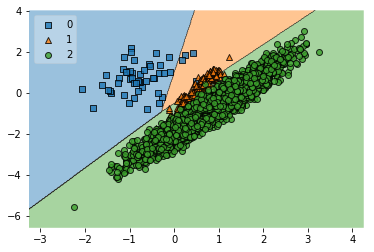

In [15]:
oss=OneSidedSelection(random_state=0)
X7,y7 = oss.fit_resample(X,y)
print("Dados com resample via Condensed_NN",Counter(y7).items())
svm7=LinearSVC(C=1,random_state=0).fit(X7,y7)
print("Score para o modelo SVM rebalanceado via Condensed_NN",svm7.score(X7,y7))
plot_decision_regions(X=X7,y=y7,clf=svm7,legend=2)

Alternativamente podemos usar o algoritmo "NeighbourhoodCleaningRule" que procura limpar os dados do que reagrupar os mesmos. Apesar do melhor score, como pode ser visto abaixo, o fato é que erramos muito na classificação dos itens com menor número de dados.

Dados com resample via Condensed_NN dict_items([(2, 4666), (1, 234), (0, 64)])
Score para o modelo SVM rebalanceado via Condensed_NN 0.9806607574536664


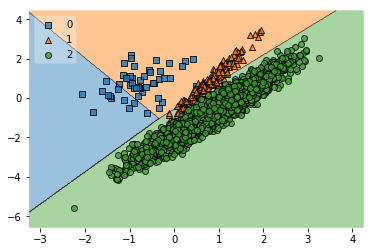

In [16]:
ncr=NeighbourhoodCleaningRule()
X8,y8 = ncr.fit_resample(X,y)
print("Dados com resample via Condensed_NN",Counter(y8).items())
svm8=LinearSVC(C=1,random_state=0).fit(X8,y8)
print("Score para o modelo SVM rebalanceado via Condensed_NN",svm8.score(X8,y8))
plot_decision_regions(X=X8,y=y8,clf=svm8,legend=2)

Por fim, podemos testar o algoritmo de classificação  "InstanceHardnessThreshold", um algoritmo que usa regressão logística para estimar as probabilidades dos dados, eliminando aqueles com menores probabilidades. Veja que falhamos em classificar apenas algumas das informações do grupo com menores dados (classe 0).

Dados com resample via Condensed_NN dict_items([(0, 64), (1, 64), (2, 64)])
Score para o modelo SVM rebalanceado via Condensed_NN 0.9427083333333334


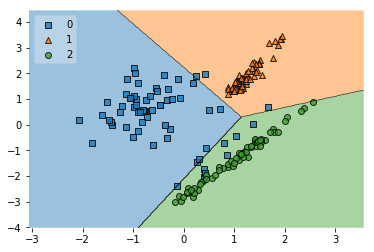

In [21]:
iht=InstanceHardnessThreshold(random_state=0,
                              estimator=LogisticRegression(solver='lbfgs',
                                                          multi_class='auto'))
X9,y9 = iht.fit_resample(X,y)
print("Dados com resample via Condensed_NN",Counter(y9).items())
svm9=LinearSVC(C=1,random_state=0).fit(X9,y9)
print("Score para o modelo SVM rebalanceado via Condensed_NN",svm9.score(X9,y9))
plot_decision_regions(X=X9,y=y9,clf=svm9,legend=2)